In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
!ls

118728-thewallpaper.jpg
35013106-11.pdf
7071986D45.ebdl
70DEB81D4D.ebdl
991 FAULT CODES.pdf
A917228599.ebdl
AD0F8E4D06.ebdl
ATI2015_userguide_ja-JP.pdf
AXIS - P135720161207-152754-1481092074.mp4
AXIS_Video_Motion_Detection_3.eap
AcronisBackup_12_userguide_ja-JP.pdf
Analytics.py
Arbitrage.py
BB309E2A3A.ebdl
DL-Intro-Lee.pdf
DSC_0346.png
Docker.dmg
ESGについて.docx
GitHub Desktop 222.zip
GoPro-MacInstaller-1.4.0.3411.dmg
IMAG1296.png
IPSJ-MPS10081009.pdf
Mastering-Python-for-Finance[ebooksfeed.com].pdf
NNData
Oracle_VM_VirtualBox_Extension_Pack-5.0.16.vbox-extpack
Prepros-Mac-6.0.4.zip
Python_for_Finance.pdf
QQE.pdf
Serengeti_Elefantenbulle.jpg
Silverlight.dmg
SourceTree_2.1.dmg
SourceTree_2.4a.zip
VirtualBox-5.0.14-105127-OSX-2.dmg
VirtualBox-5.0.14-105127-OSX.dmg
VirtualBox-5.0.16-105871-OSX.dmg
asukul_23015381.txt
awslinuxvirginia.pem
bootstrap-3.3.7-dist.zip
bootstrap-3.3.7.zip
bvlc_reference_caffenet.caffemodel
bvlc_reference_rcnn_ilsvrc13.caffemodel
caffe-master.zip
caffe_ilsvrc12
caff

In [3]:
#datafile = "/home/hideaki/SynologyNFS/myProgram/pythonProj/KaggleData/TwoSigma/train.h5"
datafile = "/Users/donchan/Documents/myData/KaggleData/TwoSigma/train.h5"

hfdata = pd.HDFStore(datafile,"r")

In [4]:
train = hfdata.get("train")

In [5]:
train.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,...,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.536046e+00,7.729436e+11,-3.320328e-01,-5.046012e-01,1.801661e+01,-2.040938e-02,-5.703754e+08,-1.622954e-01,...,-8.584833e-02,-9.103397e-02,-8.156685e-02,-7.287001e-02,4.908321e-02,5.236218e-03,-1.699966e-02,-9.735299e-01,3.881475e-04,2.217509e-04
std,6.308563e+02,5.195685e+02,2.497382e+02,7.620606e+13,6.519810e+01,1.020749e+02,9.258360e+02,2.494859e-01,7.502322e+10,3.668150e+00,...,6.125852e-01,2.471038e-01,2.346534e-01,2.235729e-01,3.102316e-01,1.133733e-01,2.116284e-01,9.605551e-01,3.011983e-02,2.240643e-02
min,0.000000e+00,0.000000e+00,-2.017497e+04,-7.375435e-02,-9.848880e+03,-3.434176e+04,-8.551914e+03,-2.344957e+00,-1.043737e+13,-1.077101e+03,...,-1.687572e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-5.250904e-01,-4.449529e-01,-1.000000e+00,-2.000000e+00,-1.265686e-01,-8.609413e-02
25%,5.500000e+02,5.040000e+02,-1.449710e-01,-2.956479e-02,-5.967524e-02,-1.655826e-01,-1.057050e-01,-1.996543e-01,-1.960470e-01,-2.280967e-01,...,-4.050297e-01,-4.651562e-04,-1.992532e-04,-2.203252e-05,-1.521701e-01,-7.377038e-02,-3.887695e-15,-2.000000e+00,-1.998819e-02,-9.561389e-03
50%,1.098000e+03,9.560000e+02,-8.368272e-04,5.523058e-03,2.109505e-02,2.475614e-03,1.175234e-02,-4.064488e-02,-7.395084e-03,-3.029069e-02,...,-8.502064e-02,-3.951567e-12,-1.418487e-13,-1.591224e-16,-1.476793e-02,9.782702e-05,0.000000e+00,-6.597540e-01,1.117279e-05,-1.570681e-04
75%,1.657000e+03,1.401000e+03,1.199108e-01,1.078554e-01,1.952209e-01,3.037236e-01,1.556464e-01,1.303819e-01,1.832071e-01,1.764751e-01,...,1.909600e-01,-5.219879e-40,0.000000e+00,0.000000e+00,1.772415e-01,7.855728e-02,0.000000e+00,-5.188884e-08,2.047074e-02,9.520990e-03
max,2.158000e+03,1.812000e+03,3.252527e+03,1.068448e+16,3.823001e+03,1.239737e+03,6.785965e+04,1.378195e+00,5.203165e+02,7.677125e+01,...,4.957758e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.569265e+00,6.844833e-01,1.000000e+00,0.000000e+00,1.435858e-01,9.349781e-02


In [6]:
uniq_timestamp = train["timestamp"].unique()
uniq_id = train["id"].unique()

In [7]:
print len(uniq_timestamp),len(uniq_id)

1813 1424


In [8]:
i = len(uniq_timestamp) / 2

In [9]:
i

906

In [10]:
timesplit = uniq_timestamp[i]

In [11]:
df_train = train[train.timestamp < timesplit]

In [12]:
df_test = train[train.timestamp >= timesplit]

In [13]:
len(df_train)

806298

In [14]:
df_train_fillmean = df_train.fillna(df_train.mean())

In [15]:
df_train_fillmean["technical_30"].describe()

count    806298.000000
mean          0.001191
std           0.002758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.001291
max           0.071950
Name: technical_30, dtype: float64

In [18]:
df_train_fillmean["technical_20"].describe()

count    806298.000000
mean          0.001418
std           0.002754
min           0.000000
25%           0.000000
50%           0.000000
75%           0.002284
max           0.067848
Name: technical_20, dtype: float64

In [19]:
df_train_fillmean["fundamental_11"].describe()

count    806298.000000
mean         -0.362069
std           3.867840
min        -750.536987
25%          -0.362084
50%          -0.191170
75%           0.051368
max         116.747810
Name: fundamental_11, dtype: float64

In [20]:
import matplotlib.pyplot as plt 

In [21]:
tech_20 = df_train_fillmean["technical_20"].values  

In [22]:
tech_30 = df_train_fillmean["technical_30"].values  

In [23]:
plt.boxplot(   [tech_20,tech_30]   )

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e700eb450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e70101390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e7008f690>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e7008f050>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e700eb650>,
  <matplotlib.lines.Line2D at 0x7f2e7009b950>]}

In [24]:
plt.show()

In [17]:
columns = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']

In [18]:
training = df_train_fillmean( [columns] )

In [35]:
training.loc[:,"y"] = df_train_fillmean.loc[:,"y"].values
training.describe()

,technical_30,technical_20,fundamental_11,technical_19,y
count,806298.000000,806298.000000,806298.000000,806298.000000,806298.000000
mean,0.001191,0.001418,-0.362069,-0.034210,0.000256
std,0.002758,0.002754,3.867840,0.686418,0.021837
min,0.000000,0.000000,-750.536987,-3.343923,-0.086094
25%,0.000000,0.000000,-0.362084,-0.350313,-0.009334
50%,0.000000,0.000000,-0.191170,-0.016632,-0.000007
75%,0.001291,0.002284,0.051368,0.285590,0.009511
max,0.071950,0.067848,116.747810,13.466039,0.093498


In [21]:
x = np.random.randint(0,100,(4,3))

In [22]:
x

array([[99, 48, 99],
       [13, 32, 25],
       [69, 74, 54],
       [62, 91, 43]])

In [62]:
w = [0.1,0.1,0.1]

In [63]:
x * w
np.sum(x*w, axis=1)

array([ 24.6,   7. ,  19.7,  19.6])

In [48]:
ols_model = 'y ~ technical_30 + technical_20 + fundamental_11 + technical_19' 
mod = smf.ols(formula=ols_model, data= training)

In [49]:
res = mod.fit()

In [50]:
_,a,b,c,d = res.params

In [51]:
X = np.array(training)[:,:4]

In [52]:
X.shape

(806298, 4)

In [65]:
w = [a,b,c,d]
w

[0.10866357363990881,
 -0.097377833742904735,
 6.7769456353794063e-05,
 -0.00017912572193078686]

In [72]:
y_hat = np.sum(X * w,axis=1)
y_true = training["y"].values

In [73]:
len(y_hat), len(training["y"])


(806298, 806298)

In [81]:
from sklearn.metrics import r2_score
def r_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    r = np.sign(r2) * np.sqrt(np.abs(r2))
    return max(-1, r)


print y_true

print r_score(y_true,y_hat)
print r_score(y_true,y_true)

[-0.01175345 -0.00124014 -0.02093954 ..., -0.01533881 -0.00490553
  0.00153982]
0.0205053968908
1.0


In [82]:
df1 = train[['timestamp', 'y']].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()

In [83]:
df1.head()

timestamp         y                 
                 mean       std    len
0         0 -0.001870  0.026646  750.0
1         1  0.000501  0.028422  750.0
2         2 -0.005787  0.029281  750.0
3         3  0.001633  0.025333  750.0
4         4 -0.004309  0.035929  750.0

In [85]:
cumsum_ = np.cumsum(df1["y"]["mean"])

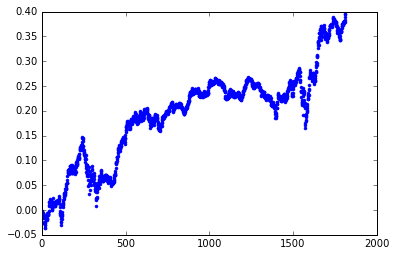

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(cumsum_)), cumsum_,"."   )
